In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
gmm_data_path = '/Users/aaryansharma/Downloads/SMAI-Dataset-customer-dataset/data.csv'

In [6]:
gmm_data_df = pd.read_csv(gmm_data_path)
gmm_data_df.head()

,Index,Gender,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0,67,2,124670,1,2
1,1,1,1,22,1,150773,1,2
2,2,0,0,49,1,89210,0,0
3,3,0,0,45,1,171565,1,1
4,4,0,0,53,1,149031,1,1


In [7]:
scaler = StandardScaler()
gmm_data_df[['Age', 'Income']] = scaler.fit_transform(gmm_data_df[['Age', 'Income']])
gmm_data_df = gmm_data_df.drop(columns=['Index'])


In [8]:
gmm_data_df.head()

,Gender,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,2.653614,2,0.097524,1,2
1,1,1,-1.187132,1,0.782654,1,2
2,0,0,1.117316,1,-0.833202,0,0
3,0,0,0.775916,1,1.328386,1,1
4,0,0,1.458716,1,0.736932,1,1


In [9]:
gmm_data_df

,Gender,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,2.653614,2,0.097524,1,2
1,1,1,-1.187132,1,0.782654,1,2
2,0,0,1.117316,1,-0.833202,0,0
3,0,0,0.775916,1,1.328386,1,1
4,0,0,1.458716,1,0.736932,1,1
...,...,...,...,...,...,...,...
1995,1,0,0.946616,1,0.067471,0,0
1996,1,1,-0.760382,1,-0.084265,1,0
1997,0,0,-0.418983,0,-0.906957,0,0
1998,1,1,-1.016432,1,-0.603329,0,0


In [10]:
gmm_data = gmm_data_df.to_numpy()
gmm_data

array([[ 0.        ,  0.        ,  2.65361447, ...,  0.09752361,
         1.        ,  2.        ],
       [ 1.        ,  1.        , -1.18713209, ...,  0.78265438,
         1.        ,  2.        ],
       [ 0.        ,  0.        ,  1.11731585, ..., -0.83320224,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.41898277, ..., -0.90695688,
         0.        ,  0.        ],
       [ 1.        ,  1.        , -1.01643224, ..., -0.60332923,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.93108232, ..., -1.3789866 ,
         0.        ,  0.        ]])

In [11]:
cov = np.cov(gmm_data, rowvar=False)
print(np.round(cov, 2))

[[ 0.25  0.14 -0.09  0.07 -0.1  -0.06 -0.12]
 [ 0.14  0.25 -0.11  0.11 -0.04 -0.01 -0.04]
 [-0.09 -0.11  1.    0.39  0.34  0.07  0.1 ]
 [ 0.07  0.11  0.39  0.36  0.14  0.02  0.02]
 [-0.1  -0.04  0.34  0.14  1.    0.43  0.4 ]
 [-0.06 -0.01  0.07  0.02  0.43  0.41  0.3 ]
 [-0.12 -0.04  0.1   0.02  0.4   0.3   0.66]]


In [184]:
# Initialise the mean and covariance matrix
clusters = 3
dimensions = 7
# A = np.random.rand(dimensions, dimensions)
covar = np.zeros((clusters, dimensions, dimensions))
mean = np.mean(gmm_data, axis=0)
for i in range(clusters):
    # A = np.random.rand(dimensions, dimensions)
    covar[i] = cov  # make the matrix positive semi-definite
    print(np.round(covar[0], 2))

print('mean:', mean)
pi = np.ones(clusters) / clusters
# print(np.round(covar[0], 2))


[[ 0.25  0.14 -0.09  0.07 -0.1  -0.06 -0.12]
 [ 0.14  0.25 -0.11  0.11 -0.04 -0.01 -0.04]
 [-0.09 -0.11  1.    0.39  0.34  0.07  0.1 ]
 [ 0.07  0.11  0.39  0.36  0.14  0.02  0.02]
 [-0.1  -0.04  0.34  0.14  1.    0.43  0.4 ]
 [-0.06 -0.01  0.07  0.02  0.43  0.41  0.3 ]
 [-0.12 -0.04  0.1   0.02  0.4   0.3   0.66]]
[[ 0.25  0.14 -0.09  0.07 -0.1  -0.06 -0.12]
 [ 0.14  0.25 -0.11  0.11 -0.04 -0.01 -0.04]
 [-0.09 -0.11  1.    0.39  0.34  0.07  0.1 ]
 [ 0.07  0.11  0.39  0.36  0.14  0.02  0.02]
 [-0.1  -0.04  0.34  0.14  1.    0.43  0.4 ]
 [-0.06 -0.01  0.07  0.02  0.43  0.41  0.3 ]
 [-0.12 -0.04  0.1   0.02  0.4   0.3   0.66]]
[[ 0.25  0.14 -0.09  0.07 -0.1  -0.06 -0.12]
 [ 0.14  0.25 -0.11  0.11 -0.04 -0.01 -0.04]
 [-0.09 -0.11  1.    0.39  0.34  0.07  0.1 ]
 [ 0.07  0.11  0.39  0.36  0.14  0.02  0.02]
 [-0.1  -0.04  0.34  0.14  1.    0.43  0.4 ]
 [-0.06 -0.01  0.07  0.02  0.43  0.41  0.3 ]
 [-0.12 -0.04  0.1   0.02  0.4   0.3   0.66]]
mean: [4.57000000e-01 4.96500000e-01 9.05941988e-17 

In [145]:
print(np.linalg.matrix_rank(covar[1]))

7


In [40]:
def sqrt_matrix(A):
    evalues, evectors = np.linalg.eigh(A)
    # Ensuring square root matrix exists
    assert (evalues >= 0).all()
    sq_matrix = evectors * np.sqrt(evalues) @ evectors.T
    return sq_matrix

In [41]:
print(gmm_data[0])
print(mean)

[0.         0.         2.65361447 2.         0.09752361 1.
 2.        ]
[4.57000000e-01 4.96500000e-01 9.05941988e-17 1.03800000e+00
 1.56319402e-16 8.10500000e-01 7.39000000e-01]


In [42]:
gmm_data.shape[0]

2000

In [43]:
responsibility = np.zeros((gmm_data.shape[0], clusters))
responsibility.shape

(2000, 3)

In [83]:
# print('gmm[0] - mean[0]:', gmm_data[0] - mean[0])
# print('covar[0]:', covar[0])
# print('inv(covar[0]):', np.linalg.inv(covar[0]))
# print('np.dot((gmm_data[0] - mean[0]), np.linalg.inv(covar[0])):', np.dot((gmm_data[0] - mean[0]), np.linalg.inv(covar[0])))
# print('(gmm_data[0] - mean[0]).T:', (gmm_data[0] - mean[0]).T)

# print('np.dot(np.dot((gmm_data[0] - mean[0]), np.linalg.inv(covar[0])), (gmm_data[0] - mean[0]).T):', np.dot(np.dot((gmm_data[0] - mean[0]), np.linalg.inv(covar[0])), (gmm_data[0] - mean[0]).T))
# -0.5 * np.dot(np.dot((gmm_data[0] - mean[0]), np.linalg.inv(covar[0])), (gmm_data[0] - mean[0]).T)


In [94]:
print(-0.5 * np.dot(np.dot((gmm_data[0] - mean[0]).T, np.linalg.inv(covar[0])), (gmm_data[0] - mean[0])))
print(-0.5 * ((gmm_data[0] - mean[0]).T @ np.linalg.inv(covar[0])) @ (gmm_data[0] - mean[0]))

-10.505104431915598
-10.505104431915598
[ 0.46554528  2.71009209  0.44636411 -4.15549567  1.91003103 -1.35058302
 -1.42736266]


In [199]:
# E-Step

for i in range(gmm_data.shape[0]):
    denominator = 0
    for k in range(clusters):
        if np.linalg.matrix_rank(covar[k]) < dimensions:
            print('covar[k]:', covar[k])
            print('det(covar[k]):', np.linalg.det(covar[k]))
            raise ValueError(f"Assertion failed for k={k}")

        denominator += pi[k] * ((np.sqrt(1/np.linalg.det(covar[k])))) * np.exp(-0.5 * np.dot(np.dot((gmm_data[i] - mean[k]).T, np.linalg.inv(covar[k])), (gmm_data[i] - mean[k])))
    for c in range(clusters):
        responsibility[i,c] = (pi[c] * ((np.sqrt(1/np.linalg.det(covar[c])))) * np.exp(-0.5 * np.dot(np.dot((gmm_data[i] - mean[c]).T, np.linalg.inv(covar[c])), (gmm_data[i] - mean[c]))))/denominator

print(responsibility.shape)
with np.printoptions(threshold=np.inf):
    print(responsibility)

(2000, 3)
[[9.98046189e-01 1.95381108e-03 1.72947679e-20]
 [9.78649865e-01 2.13501354e-02 3.97732144e-30]
 [3.05380015e-02 9.69461999e-01 8.98335682e-13]
 [9.99994907e-01 5.09303404e-06 3.97150230e-23]
 [9.99864291e-01 1.35709288e-04 1.85674620e-20]
 [8.54731830e-01 1.45268170e-01 2.90716187e-16]
 [9.99973061e-01 2.69394937e-05 2.70896856e-21]
 [9.99999702e-01 2.97928054e-07 1.51221012e-28]
 [9.99809625e-01 1.90375469e-04 1.17946089e-24]
 [9.47929323e-01 5.20706772e-02 4.92700249e-28]
 [1.18405335e-01 8.81594665e-01 6.60165390e-24]
 [5.74096182e-02 9.42590382e-01 1.98074227e-25]
 [8.12462402e-01 1.87537598e-01 1.24922792e-26]
 [2.78386845e-04 9.99721613e-01 3.13411790e-16]
 [7.61785168e-01 2.38214832e-01 7.03897681e-25]
 [5.78298180e-01 4.21701820e-01 8.61336094e-20]
 [9.19824129e-01 8.01758709e-02 3.70822702e-17]
 [9.48526341e-01 5.14736590e-02 3.82228506e-20]
 [1.00000000e+00 3.23015343e-26 1.09053937e-55]
 [8.73977644e-01 1.26022356e-01 6.21499311e-18]
 [9.65772100e-01 3.42279004e-0

In [197]:
# check if it is a valid responsibility matrix with all the row sums as 1
# with np.printoptions(threshold=np.inf):
#     print(np.sum(responsibility, axis=1))
if not np.allclose(np.sum(responsibility, axis=1), np.ones(gmm_data.shape[0])):
    raise ValueError("Assertion failed")
else:
    print("Assertion passed")

Assertion passed


In [169]:
print(np.linalg.matrix_rank(np.outer(gmm_data[0]-mean, gmm_data[0]-mean)+0.01*np.eye(dimensions)))
print(np.linalg.matrix_rank(np.outer(gmm_data[0]-mean, gmm_data[0]-mean)))
print((np.outer(gmm_data[0]-mean, gmm_data[0]-mean)).shape)


7
1
(7, 7)


In [198]:
# M-Step
for c in range(clusters):
    # if not np.array_equal(responsibility[:, c], np.zeros(gmm_data.shape[0])):
    N = np.sum(responsibility[:,c])
    new_mean = np.zeros(dimensions)
    new_pi = N/gmm_data.shape[0]
    new_covar = np.zeros((dimensions, dimensions))
    for i in range(gmm_data.shape[0]):
        new_mean += (responsibility[i,c] * gmm_data[i])/N
    for i in range(gmm_data.shape[0]):
        new_covar += (responsibility[i,c] * np.outer(gmm_data[0]-mean, gmm_data[0]-mean))/N
    if np.linalg.matrix_rank(new_covar) < dimensions:
        new_covar +=  0.1*np.identity(dimensions) # regularization for non-invertible convariance matrix
    covar[c] = new_covar
    mean = new_mean
    pi[c] = new_pi
    print('covar:', covar[c])
    # print det
    print('det(covar):', np.linalg.det(covar[c]))

covar: [[ 1.00072738e-01  8.00436077e-06 -2.90925210e-02 -1.63084508e-02
  -1.33878329e-02 -8.52199926e-03 -1.70547334e-02]
 [ 8.00436077e-06  1.00000881e-01 -3.20143038e-03 -1.79463203e-03
  -1.47323826e-03 -9.37786979e-04 -1.87675526e-03]
 [-2.90925210e-02 -3.20143038e-03  1.17358674e+01  6.52274073e+00
   5.35460809e+00  3.40846548e+00  6.82122449e+00]
 [-1.63084508e-02 -1.79463203e-03  6.52274073e+00  3.75646540e+00
   3.00164303e+00  1.91069010e+00  3.82378702e+00]
 [-1.33878329e-02 -1.47323826e-03  5.35460809e+00  3.00164303e+00
   2.56409028e+00  1.56851193e+00  3.13899966e+00]
 [-8.52199926e-03 -9.37786979e-04  3.40846548e+00  1.91069010e+00
   1.56851193e+00  1.09843325e+00  1.99812420e+00]
 [-1.70547334e-02 -1.87675526e-03  6.82122449e+00  3.82378702e+00
   3.13899966e+00  1.99812420e+00  4.09876536e+00]]
det(covar): 2.2853695316571965e-05
covar: [[ 0.25973452  0.18443593 -1.00265507 -0.37042828  0.03485951 -0.03164433
  -0.42559989]
 [ 0.18443593  0.31295716 -1.15770599 -0.4

In [44]:
class GMM:
    def __init__(self, data, number_of_clusters=3):
        self.data = data
        self.number_of_clusters = number_of_clusters
        self.dimensions = self.data.shape[1]
        self.responsibility = np.zeros((self.data.shape[0], self.number_of_clusters))
        self.pi = np.ones(self.number_of_clusters) / self.number_of_clusters
        self.mean = np.zeros((self.number_of_clusters, self.dimensions))
        for i in range(self.number_of_clusters):
            self.mean[i] = np.random.rand(self.dimensions)
        self.covar = np.zeros((self.number_of_clusters, self.dimensions, self.dimensions))
        for i in range(self.number_of_clusters):
            self.covar[i] = np.cov(self.data, rowvar=False)
        self.current_iteration = 0
        self.current_log_likelihood = 0
        self.iterations_log_likelihood = []
        self.tolerance = 1e-4
    def multivariate_gaussian(self, data, mean, covar):
        d = self.dimensions
        # print('data:', data)
        # print('mean:', mean)
        # print('covar:', covar)
        return (((2*np.pi)**(d/2))*np.sqrt(1/np.linalg.det(covar)) * np.exp(-0.5 * np.dot(np.dot((data - mean).T, np.linalg.inv(covar)), (data - mean))))
    
    # def initialize(self):
    #     for i in range(self.number_of_clusters):
    #         self.covar[i] = np.cov(self.data, rowvar=False)
    #     # print(np.cov(self.data, rowvar=False))
    #     return self.covar

    
    def expectation_step(self, data, mean, covar, pi):
        responsibility = np.zeros((data.shape[0], self.number_of_clusters))
        for i in range(data.shape[0]):
            denominator = 0
            for k in range(self.number_of_clusters):
                # error thrown when np.linalg.matrix_rank(new_covar_vec[c]) < self.dimensions
                # print('current iteration:', self.current_iteration)
                # print('covar[k]:', covar[k])
                if np.linalg.matrix_rank(covar[k]) < self.dimensions:
                    raise ValueError(f"Assertion failed for k={k}, covar={covar[k]} is not invertible")
                denominator += pi[k] * self.multivariate_gaussian(data[i], mean[k], covar[k])
            for c in range(self.number_of_clusters):
                # print('llls', pi[c] * self.multivariate_gaussian(data[i], mean[c], covar[c])/denominator)
                # print('denominator', denominator)
                # print(self.multivariate_gaussian(data[i], mean[c], covar[c]))
                responsibility[i,c] = (pi[c] * self.multivariate_gaussian(data[i], mean[c], covar[c]))/denominator
        assert np.allclose(np.sum(responsibility, axis=1), np.ones(data.shape[0]))
        self.responsibility = responsibility
        return responsibility
    
    def maximization_step(self, data, responsibility):
        mean = np.zeros((self.number_of_clusters, self.dimensions))
        pi = np.zeros(self.number_of_clusters)
        new_covar_vec = np.zeros((self.number_of_clusters, self.dimensions, self.dimensions))
        for c in range(self.number_of_clusters):
            N = np.sum(responsibility[:,c])
            new_mean = np.zeros(self.dimensions)
            new_pi = N/data.shape[0]
            for i in range(data.shape[0]):
                new_mean += (responsibility[i,c] * data[i])
            for i in range(data.shape[0]):
                # print('current iteration:', self.current_iteration)
                # print('new_covar_vec[c]:', new_covar_vec[c])
                new_covar_vec[c] += (responsibility[i,c] * np.outer(data[i]-new_mean, data[i]-new_mean))
            new_covar_vec[c] = new_covar_vec[c]/N
            new_mean = new_mean/N
            # error thrown when np.linalg.matrix_rank(new_covar_vec[c]) < self.dimensions
            # print('current iteration:', self.current_iteration)
            # print('new_covar_vec[c]:', new_covar_vec[c])
            if np.linalg.matrix_rank(new_covar_vec[c]) < self.dimensions:
                new_covar_vec[c] +=  0.01*np.identity(self.dimensions)
            mean[c] = new_mean
            pi[c] = new_pi
        
        self.pi = pi
        self.mean = mean
        self.covar = new_covar_vec
        return pi, mean, new_covar_vec
    
    def fit(self, data, number_of_iterations=100):
        mean = self.mean
        pi = self.pi
        covar = self.covar
        for i in range(self.number_of_clusters):
            covar[i] = np.cov(data, rowvar=False)
        for i in range(number_of_iterations):
            prev_mean = self.mean
            self.iterations_log_likelihood.append(self.log_likelihood(data, mean, covar, pi))
            responsibility = self.expectation_step(data, mean, covar, pi)
            pi, mean, covar = self.maximization_step(data, responsibility)
            self.current_iteration += 1
            if np.any(np.abs(prev_mean - mean) < self.tolerance) and self.current_iteration > 5:
                print('previous mean:', prev_mean)
                print('current mean:', mean)
                print('Converged at iteration:', self.current_iteration)
                break
        return pi, mean, covar
    
    def fit_predict(self, data, number_of_iterations=100):
        pi, mean, covar = self.fit(data, number_of_iterations)
        responsibility = self.expectation_step(data, mean, covar, pi)
        return np.argmax(responsibility, axis=1)
    
    def log_likelihood(self, data, mean, covar, pi):
        log_likelihood = 0
        for i in range(data.shape[0]):
            likelihood = 0
            for c in range(self.number_of_clusters):
                likelihood += pi[c] * self.multivariate_gaussian(data[i], mean[c], covar[c])
            log_likelihood += np.log(likelihood)
        return log_likelihood


    def bic(self, data, mean, covar, pi):
        log_likelihood = self.log_likelihood(data, mean, covar, pi)
        n_features = self.dimensions
        clusters = self.number_of_clusters

        params =  clusters * (n_features + n_features * (n_features + 1) / 2) + (clusters - 1)
        bic = -2 * log_likelihood + np.log(data.shape[0]) * params
        return bic

    def aic(self, data, mean, covar, pi):
        log_likelihood = self.log_likelihood(data, mean, covar, pi)
        n_features = self.dimensions
        clusters = self.number_of_clusters

        params = (clusters * (n_features + n_features * (n_features + 1) / 2)) + (clusters - 1)
        aic = 2 * params - 2 * log_likelihood
        return aic
    
    def plot_log_likelihood_iteration(self):
        plt.plot(self.iterations_log_likelihood)
        plt.xlabel('Iterations')
        plt.ylabel('Log Likelihood')
        plt.title('Log Likelihood vs Iterations')
        plt.show()



In [71]:
gmm = GMM(gmm_data, 3)

# gmm.initialize()



In [72]:
x = gmm.fit(gmm_data)


previous mean: [[ 0.49428443  0.25795573  0.49016248  1.2880092   0.23192799  0.68181099
   0.52780208]
 [ 0.04567503  0.43745311  0.33615935  1.12659324  0.12293041  1.04025754
   1.11609306]
 [ 0.7463842   0.7463842  -0.68123967  0.7552473  -0.29412369  0.74099492
   0.62491103]]
current mean: [[ 5.84184581e-01  3.27916852e-01  5.76208488e-01  1.36885321e+00
   2.57724728e-01  6.87962286e-01  5.37943649e-01]
 [ 5.48687800e-04  3.70645523e-01  3.04134820e-01  1.09634237e+00
   1.06479602e-01  1.01225120e+00  1.07595578e+00]
 [ 7.31446773e-01  7.31446773e-01 -6.99794726e-01  7.31446782e-01
  -2.88792749e-01  7.41065245e-01  6.20217148e-01]]
Converged at iteration: 7


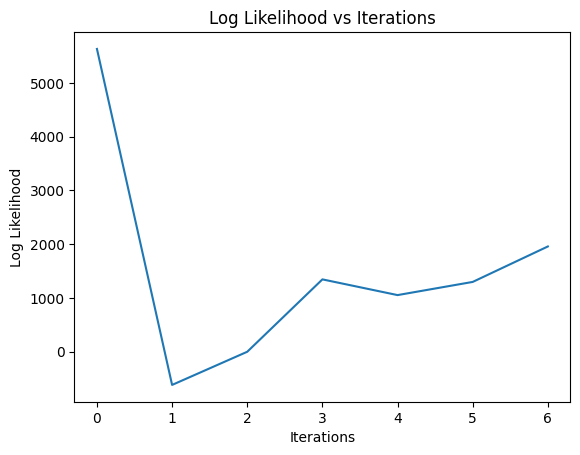

In [73]:
gmm.plot_log_likelihood_iteration()

In [43]:
print(gmm.iterations_log_likelihood)

[13983.073258353996, -293.2064991602787, -293.2064991602763, -293.2064991602783, -293.20649916027645, -293.20649916027696]


In [61]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
wine = load_wine()
print(wine.data.shape)

(178, 13)


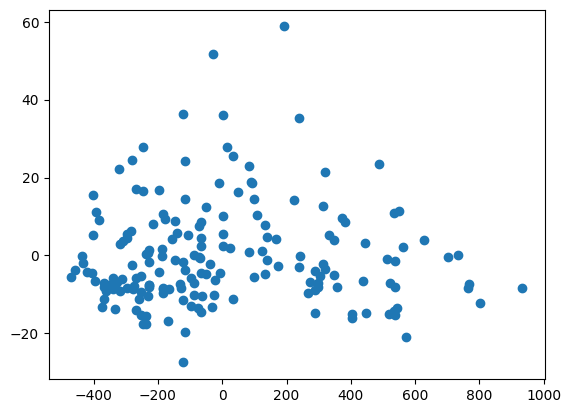

(178, 2)
k-means silouette: 0.19976712168575964
gmm silouette: 0.3352383907724748


In [69]:
pca = PCA(n_components=2)
knn = KNeighborsClassifier(n_neighbors=3)
reduced_data = pca.fit_transform(wine.data)

import matplotlib.pyplot as plt

plt.scatter(reduced_data[:,0], reduced_data[:,1])
plt.show()

print(reduced_data.shape)

knn.fit(reduced_data, wine.target)

# print(knn.score(reduced_data, wine.target))

print('k-means silouette:', silhouette_score(reduced_data, wine.target))

gmm = GaussianMixture(n_components=3)

gmm.fit(reduced_data)

# print(gmm.score(reduced_data, gmm.predict(reduced_data)))

print('gmm silouette:', silhouette_score(reduced_data, gmm.predict(reduced_data)))
